In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
df.drop('ID',axis=1,inplace=True)
df.sample(5)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
28146,SSI,Airlines,Online,Ticket Protector,95,SINGAPORE,11.7,3.28,48,0
9853,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,MALAYSIA,25.0,0.00,36,0
42868,JZI,Airlines,Online,Basic Plan,37,JAPAN,35.0,12.25,40,0
35293,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,14.0,0.00,36,0
48361,JZI,Airlines,Online,Basic Plan,3,MALAYSIA,18.0,6.30,43,0


In [3]:
df.shape

(52310, 10)

In [4]:
df.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [5]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,58.256108,48.554673,12.219963,39.555725,0.166699
std,109.138708,60.198589,22.847645,13.762473,0.372710
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,33.000000,0.000000
50%,24.000000,29.500000,0.000000,36.000000,0.000000
75%,57.000000,55.000000,13.380000,43.000000,0.000000
max,4881.000000,682.000000,262.760000,118.000000,1.000000


# Data Visualization

In [6]:
df.rename({'Commision (in value)':'Commission'},axis=1,inplace=True)
df.head()


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [7]:
df.groupby(['Product Name'])['Duration'].mean().sort_values(ascending=False).values[:10]

array([384.80434783, 380.26      , 375.29508197, 372.94505963,
       370.76271186, 368.66666667, 365.75      , 364.6547619 ,
       113.52948718,  76.28057554])

C:\Users\HaiderAli\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

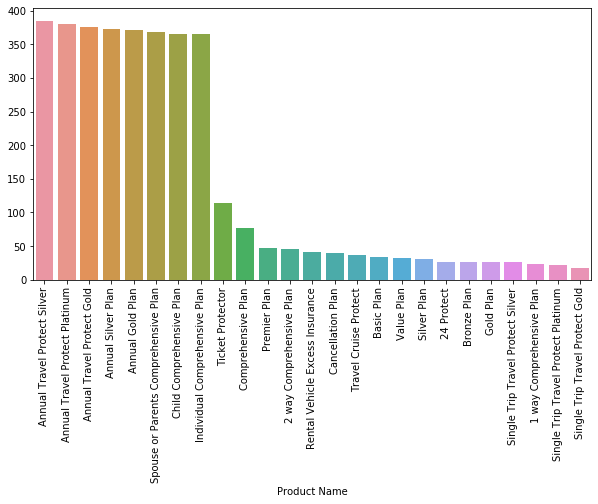

In [8]:
plt.figure(figsize=(10,5))

sns.barplot(df.groupby(['Product Name'])['Duration'].mean().sort_values(ascending=False).index,
            df.groupby(['Product Name'])['Duration'].mean().sort_values(ascending=False).values)
plt.xticks(rotation=90)

In [9]:
top10prod = df['Distribution Channel'].value_counts()
top10prod = top10prod[:10].index.to_list()

In [10]:
top10prod = df[df['Distribution Channel'].isin(top10prod)]
top10prod

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.0000,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.0000,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.8800,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.0000,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.0000,36,0
...,...,...,...,...,...,...,...,...,...,...
52305,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1
52306,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.000000,9.2000,54,0
52307,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37,0
52308,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46,0


In [11]:
print(df.Duration.max())
df.Duration.min()

4881


-2

In [12]:
top10prod.groupby(['Agency'])['Claim'].value_counts().unstack()[0]

Agency
ADM       56.0
ART      223.0
C2B     5438.0
CBH       75.0
CCR      146.0
CSR       59.0
CWT     5965.0
EPX    24338.0
JWT      519.0
JZI     4363.0
KML      266.0
LWC      454.0
RAB      526.0
SSI      723.0
TST      373.0
TTW       66.0
Name: 0, dtype: float64

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt

# #create data
# # top10prod = df['Product Name'].value_counts()[:10].index
# # top10prod = df[df['Product Name'] == top10prod]
# # top10prod = df[df['Product Name'].isin(top10prod)]

# product = top10prod
# Claim_A = top10prod.groupby(['Agency'])['Claim'].value_counts().unstack()[0]
# Claim_B = top10prod.groupby(['Agency'])['Claim'].value_counts().unstack()[1]
# #define chart parameters
# N = 10
# barWidth = .9
# xloc = np.arange(N)

# plt.figure(figsize=(10,5))
# #display stacked bar chart
# p1 = plt.bar(xloc, Claim_A, width=barWidth)
# p2 = plt.bar(xloc, Claim_B, bottom=product_A, width=barWidth)

# plt.ylabel('Claim')
# plt.xlabel('Agency')
# plt.legend(('0','1'))
# plt.title('Agency and Claim')
# plt.xticks(xloc, df['Agency'].unique(),rotation=90)
# # plt.yticks(np.arange(0, 41, 5))
# #plt.legend((p1[0], p2[0]), ('A', 'B'))

# #display chart
# plt.show()

In [15]:
df.groupby(['Duration'])['Commission'].mean()

Duration
-2       7.700000
-1       6.300000
 0       9.814762
 1       2.159469
 2       2.177324
           ...   
 4815    0.090000
 4831    0.090000
 4844    0.090000
 4847    0.090000
 4881    0.040000
Name: Commission, Length: 439, dtype: float64

In [23]:
df['Agency'].value_counts(normalize=True)

EPX    0.501204
C2B    0.202925
CWT    0.130243
JZI    0.088301
LWC    0.015408
SSI    0.014911
JWT    0.010514
RAB    0.010075
TST    0.007532
KML    0.005984
ART    0.004263
CCR    0.002982
TTW    0.001988
CBH    0.001453
CSR    0.001147
ADM    0.001071
Name: Agency, dtype: float64

C:\Users\HaiderAli\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


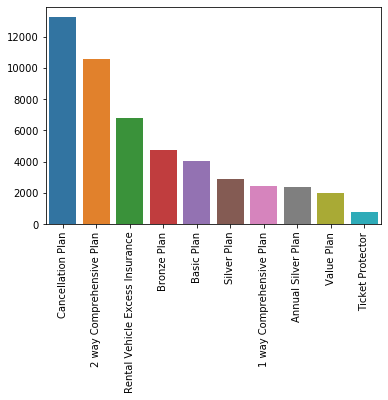

In [16]:
sns.barplot(df['Product Name'].value_counts().index[:10],df['Product Name'].value_counts().values[:10])
plt.xticks(rotation=90);

C:\Users\HaiderAli\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


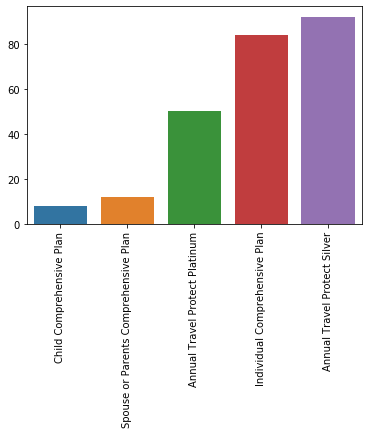

In [156]:
sns.barplot(df['Product Name'].value_counts().index[-1:-6:-1],df['Product Name'].value_counts().values[-1:-6:-1])
plt.xticks(rotation=90);

C:\Users\HaiderAli\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


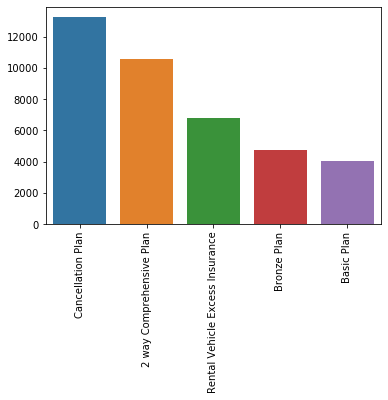

In [148]:
sns.barplot(df['Product Name'].value_counts().index[:5],df['Product Name'].value_counts().values[:5])
plt.xticks(rotation=90);

C:\Users\HaiderAli\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


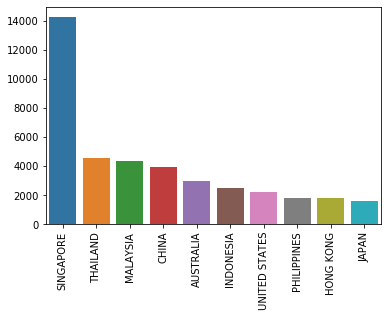

In [263]:
sns.barplot(df['Destination'].value_counts().index[:10],df['Destination'].value_counts().values[:10])
plt.xticks(rotation=90);

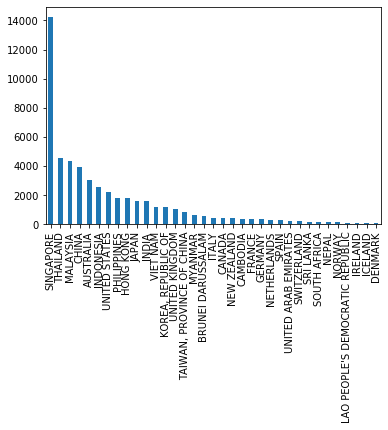

In [76]:
df.Destination.value_counts()[:35].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

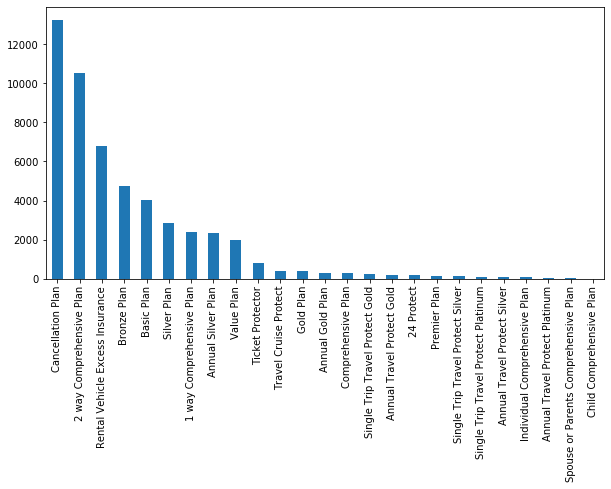

In [265]:
plt.figure(figsize=(10,5))
df['Product Name'].value_counts().plot(kind='bar')

In [322]:
product_claim.sort_values(by=1,ascending=False)

Claim,0,1,All
Product Name,,,
Bronze Plan,2703,2020,4723
2 way Comprehensive Plan,9098,1457,10555
Annual Silver Plan,897,1451,2348
Silver Plan,1478,1384,2862
Rental Vehicle Excess Insurance,5965,848,6813
Cancellation Plan,12899,355,13254
Basic Plan,3796,246,4042
Annual Gold Plan,123,172,295
Gold Plan,237,143,380


Claim                                     0     1    All
Product Name                                            
Cancellation Plan                     12899   355  13254
2 way Comprehensive Plan               9098  1457  10555
Rental Vehicle Excess Insurance        5965   848   6813
Basic Plan                             3796   246   4042
Bronze Plan                            2703  2020   4723
1 way Comprehensive Plan               2341    68   2409
Value Plan                             1867    94   1961
Silver Plan                            1478  1384   2862
Annual Silver Plan                      897  1451   2348
Ticket Protector                        723    57    780
Travel Cruise Protect                   373    21    394
Comprehensive Plan                      266    12    278
Gold Plan                               237   143    380
24 Protect                              165     0    165
Premier Plan                            139     2    141
Single Trip Travel Protect Gold

C:\Users\HaiderAli\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


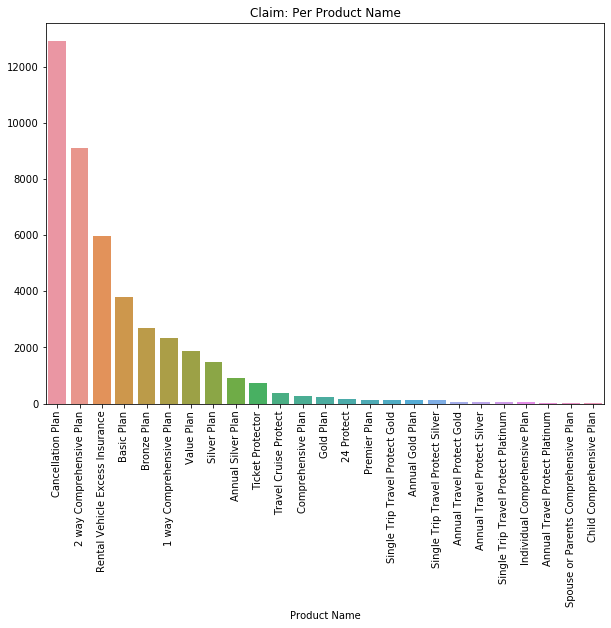

In [18]:
product_claim = pd.crosstab(df['Product Name'],df['Claim'],margins=True)
product_claim.drop(index=['All'],inplace=True)
plt.figure(figsize=(10, 7))
product_claim.sort_values(by=0,ascending=False,inplace=True)
print(product_claim)
sns.barplot(product_claim.index, product_claim[0].values)
plt.xticks(rotation=90)
plt.title("Claim: Per Product Name")
plt.show()

In [324]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [488]:
df.Agency

0        EPX
1        EPX
2        CWT
3        EPX
4        EPX
        ... 
52305    C2B
52306    RAB
52307    C2B
52308    EPX
52309    C2B
Name: Agency, Length: 52310, dtype: object

In [5]:
df[df.Age == 15].Claim.value_counts()

0    9
Name: Claim, dtype: int64

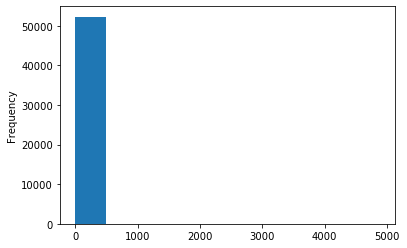

In [6]:
df.Duration.plot(kind='hist')

In [183]:
len(df[df['Net Sales'] > 335])

204

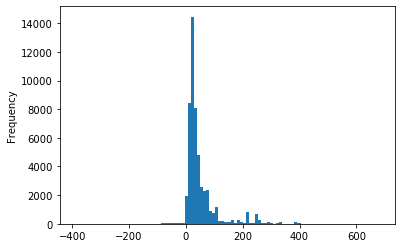

In [184]:
df['Net Sales'].plot(kind='hist',bins=100)

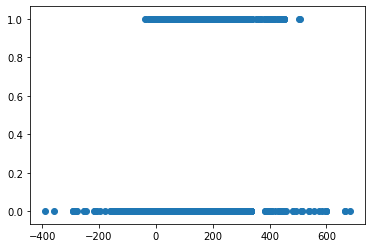

In [185]:
plt.scatter(df['Net Sales'],df.Claim)

In [186]:
len(df[df.Duration <= 0])

46

In [187]:
df = df.drop(df[df.Duration <= 0].index)#Increase in precision about 0.01 percent.
df = df.drop(df[df['Net Sales'] > 335].index)
52310 - len(df)

250

# Data Cleaning

In [188]:
set(df.columns) - set(testdf.columns)

{'Claim'}

In [300]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
le = LabelEncoder()
onehot = OneHotEncoder()

test_cat = testdf.select_dtypes(exclude='number')
for i in df.select_dtypes('object').columns:
    df.loc[:,i]= onehot.fit_transform([df[i]])
    testdf.loc[:,i] = onehot.transform([testdf[i]])
    df.loc[:,i]= le.fit_transform(df[i])
    testdf.loc[:,i] = le.transform(test_cat[i])

testdf.head()

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [147]:
#df.drop(['Agency','Agency Type','Product Name','Age','Commision (in value)','Duration'],axis=1,inplace=True)
test_id = testdf.ID
#testdf.drop(['Agency','ID','Agency Type','Product Name','Age','Commision (in value)','Duration'],axis=1,inplace=True)

In [148]:
df.Claim.value_counts(normalize=True)

0    0.834844
1    0.165156
Name: Claim, dtype: float64

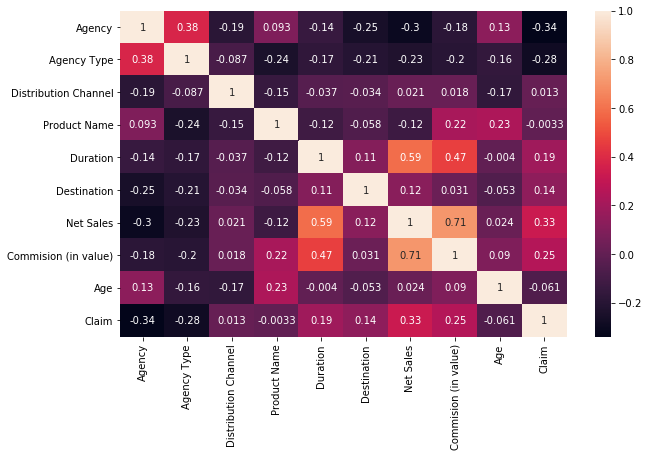

In [149]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [301]:
train = df.drop('Claim',axis=1)
test = df.Claim

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train,test,random_state=45,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((41848, 9), (10462, 9), (41848,), (10462,))

In [302]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(learning_rate=0.35,n_estimators=2000,max_depth=4)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Training Score :",clf.score(X_train,y_train))
clf.score(X_test,y_test)

ValueError: could not convert string to float: 'KML'

In [152]:
ct = pd.crosstab(y_test,y_pred)
ct

col_0,0,1
Claim,,
0,8543,181
1,299,1389


In [299]:
precision = ct[1][1]/(ct[1][1]+ct[1][0])
precision

NameError: name 'ct' is not defined

In [156]:
testdf.drop("ID",axis=1,inplace=True)
testdf.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,7,1,1,10,192,33,18.0,0.00,36
1,7,1,1,0,2,75,20.0,0.00,36
2,2,0,1,9,13,75,13.5,3.38,24
3,7,1,1,1,133,82,41.0,0.00,36
4,2,0,1,17,2,75,30.0,7.50,32


In [157]:
test_pred = clf.predict(testdf)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [158]:
sub = pd.DataFrame({"ID":test_id,'Claim':test_pred})
sub.to_csv('submission.csv',index=False)

In [486]:
pd.read_csv('submission.csv').Claim.value_counts()

0    20706
1     1715
Name: Claim, dtype: int64

In [37]:
cat = df[['Agency','Agency Type','Distribution Channel','Product Name','Destination']]
cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,EPX,Travel Agency,Online,Cancellation Plan,PHILIPPINES
1,EPX,Travel Agency,Online,Cancellation Plan,MALAYSIA
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,THAILAND
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,HONG KONG
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,MALAYSIA


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat.columns:
    cat.loc[:,i]= le.fit_transform(cat[i])

C:\Users\HaiderAli\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\HaiderAli\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [43]:
cat = cat.join(df['Claim'])

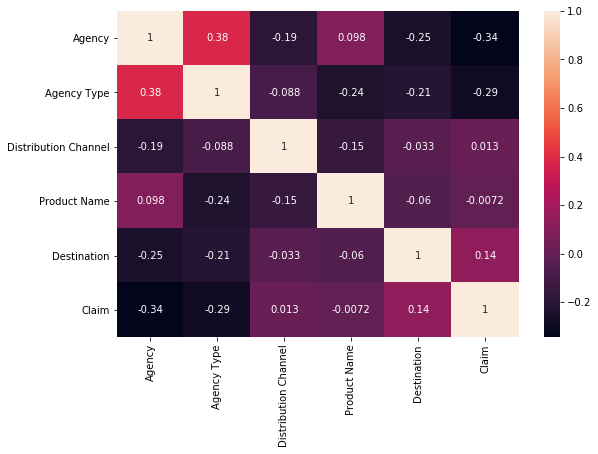

In [48]:
plt.figure(figsize=(9,6))
sns.heatmap(cat.corr(),annot=True)

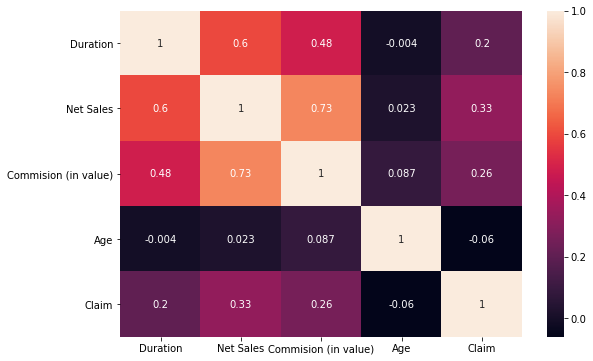

In [50]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True)

In [51]:
df.shape

(52310, 10)